In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(),'data','temperature.csv'), encoding='shift-jis', skiprows=3)
df.columns = ['datetime', 'temp']
df['datetime'] = pd.to_datetime(df['datetime'])

print(df.shape)
print(df['datetime'].min(), '\n-->', df['datetime'].max())
df.head()

(8784, 2)
2022-11-26 01:00:00 
--> 2023-11-27 00:00:00


,datetime,temp
0,2022-11-26 01:00:00,10.9
1,2022-11-26 02:00:00,10.9
2,2022-11-26 03:00:00,10.7
3,2022-11-26 04:00:00,10.7
4,2022-11-26 05:00:00,10.6


R^2 score: 0.9894659661337258


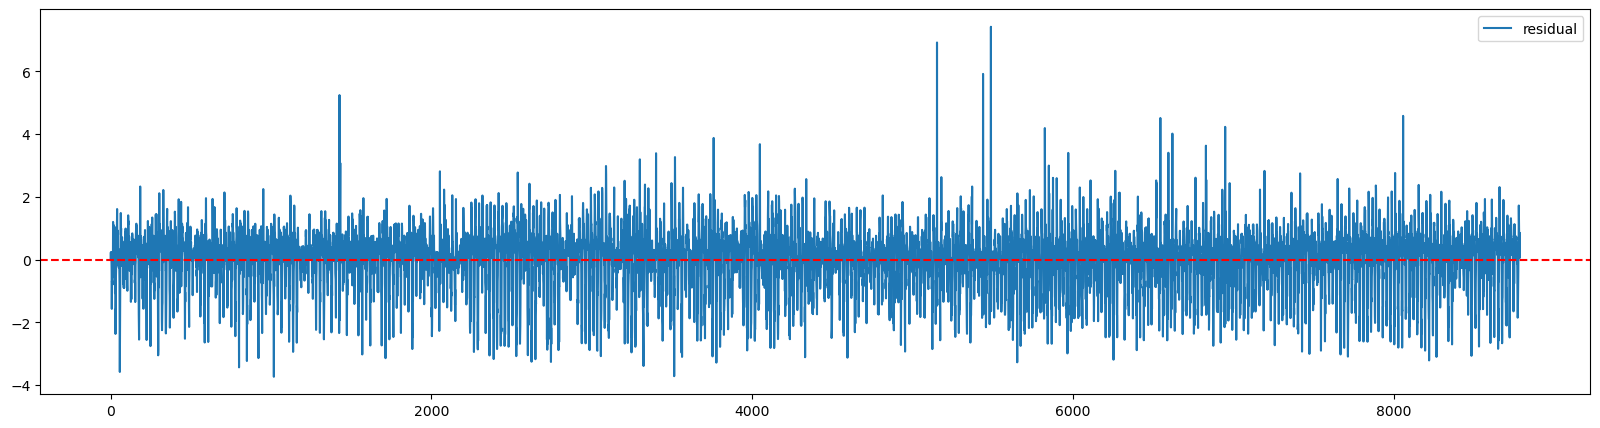

In [3]:
# ARモデルの次数
P = 1

df_lag = df[['temp']].copy()
for lag in range(1, P+1):
    df_lag[f'lag{lag}'] = df_lag.temp.shift(lag)
df_lag = df_lag.dropna()

# 線形回帰モデルの構築
from sklearn.linear_model import LinearRegression
ar = LinearRegression()
ar.fit(df_lag.drop('temp', axis=1), df_lag['temp'])

# 予測値の計算
pred = ar.predict(df_lag.drop('temp', axis=1))

# 評価
print(f'R^2 score: {ar.score(df_lag.drop("temp", axis=1), df_lag["temp"])}')

# 残差のプロット
plt.figure(figsize=(20, 5))
plt.plot(pred-df_lag['temp'], label='residual')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()

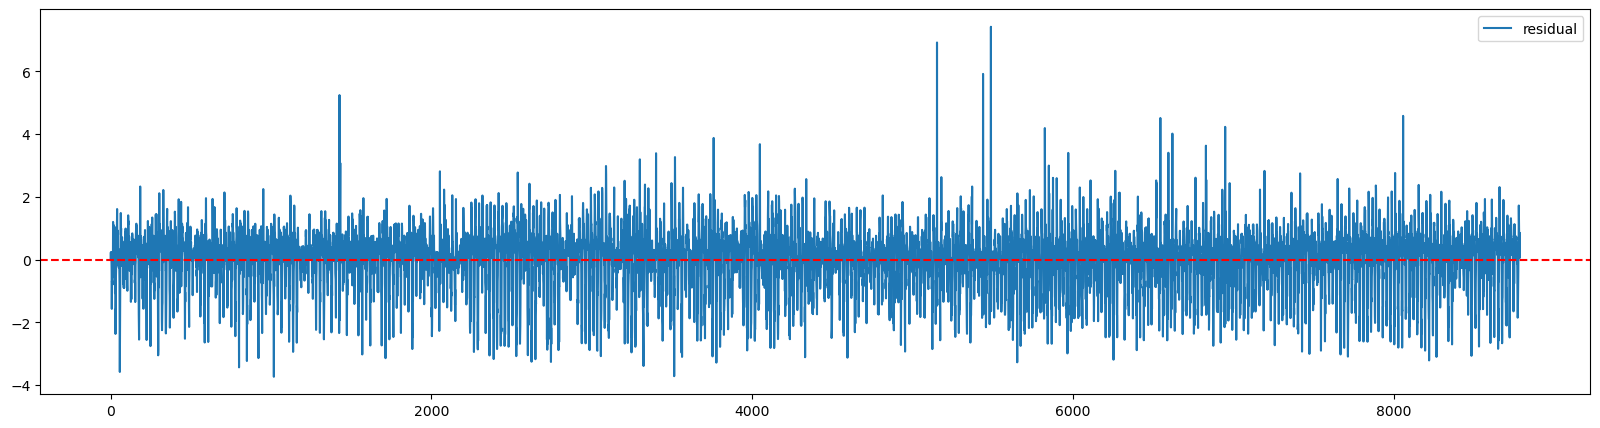

In [4]:
### statsmodelsを使ったARモデルの構築
from statsmodels.tsa.ar_model import AutoReg

# ARモデルの作成
P = 1
ar2 = AutoReg(df['temp'], lags=P, old_names=False)
ar2_fit = ar2.fit()

# 予測
pred2 = ar2_fit.predict(start=P, end=len(df)-1)

# 残差のプロット
plt.figure(figsize=(20, 5))
plt.plot(pred2-df['temp'], label='residual')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()

In [5]:
# ライブラリの結果と自分の実装の結果を比較
(pred - pred2).min(), (pred - pred2).max()

(-6.217248937900877e-15, 1.4210854715202004e-14)